In [38]:
from google.colab.patches import cv2_imshow
from google.colab import drive
import numpy as np
import cv2
import matplotlib.pyplot as plt

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


(512, 512, 3)


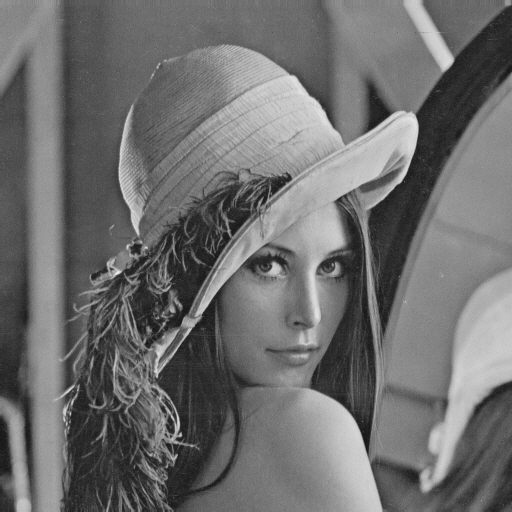

In [39]:
img = cv2.imread('/content/gdrive/My Drive/IP/Images/lena.jpg')
print(img.shape)
gimg1=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#plt.imshow(gimg1, cmap='gray')
cv2_imshow(gimg1)

In [40]:
def saturation (value):
    if(value > 255):
        value = 255
    elif(value < 0):
        value = 0
    return value

In [41]:
kernel3 = np.ones((3,3), np.float32)/9

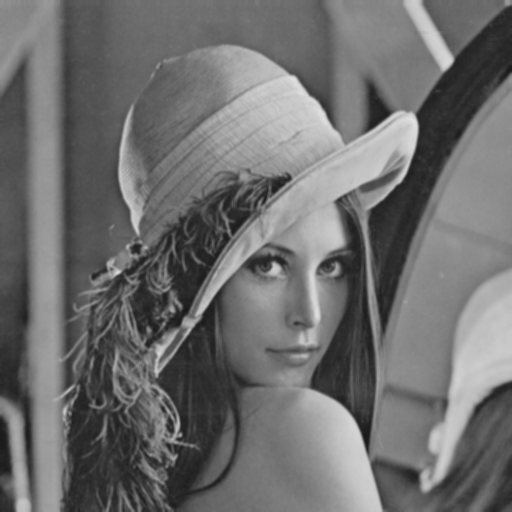

In [42]:
output = cv2.filter2D(gimg1, -1, kernel3)
cv2_imshow(output)

In [43]:
gOut = np.zeros((gimg1.shape[0], gimg1.shape[1]), dtype=np.ubyte)

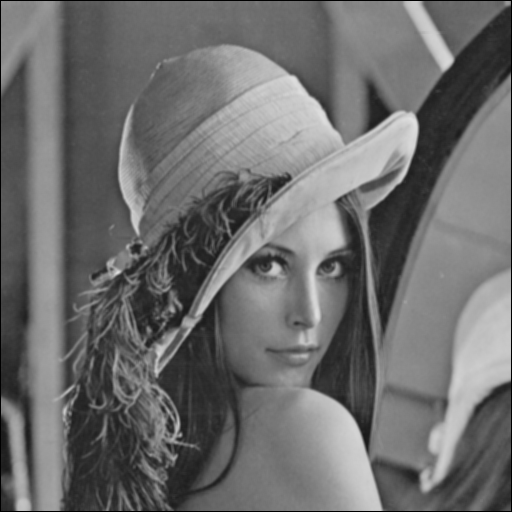

In [44]:
for h in range(1,gimg1.shape[0]-1):
  for w in range(1,gimg1.shape[1]-1):
    sum = 0
    for i in range(-1,2):
       for j in range(-1,2):
        sum += gimg1[h+i,w+j]*kernel3[i+1,j+1]
        sum=saturation(sum)
    gOut[h,w] = sum
cv2_imshow(gOut)

In [45]:
kernel3 = np.ones((3, 3), np.float32)/9
kernel4 = np.ones((5, 5), np.float32)/25
kernel5 = np.ones((7, 7), np.float32)/49

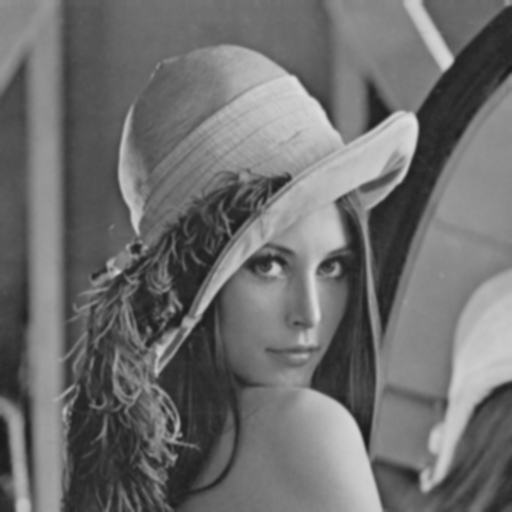

In [46]:
output = cv2.filter2D(output, -1, kernel3)
cv2_imshow(output)

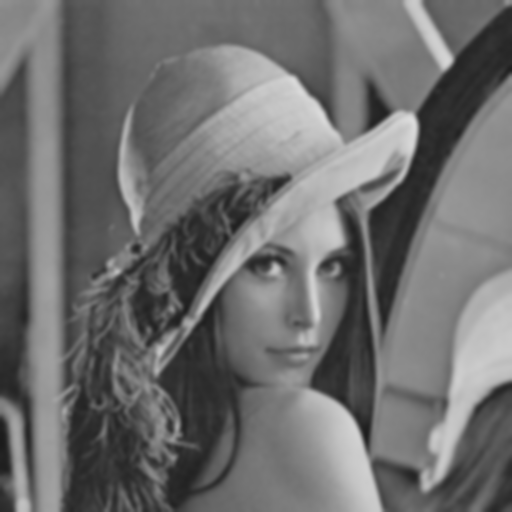

In [47]:
output = cv2.filter2D(output, -1, kernel4)
cv2_imshow(output)

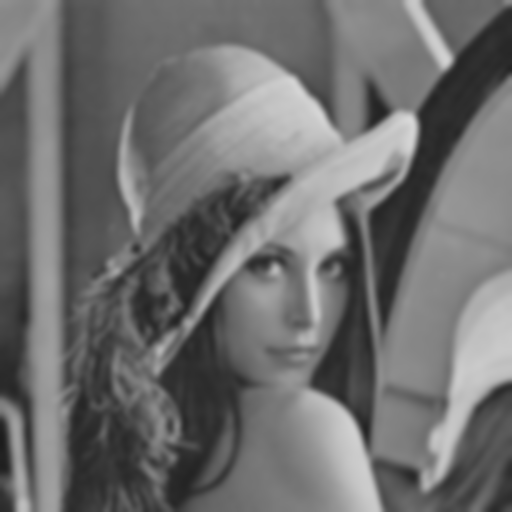

In [48]:
output = cv2.filter2D(output, -1, kernel5)
cv2_imshow(output)

In [49]:
kernel3[0][0] = -1/9
kernel3[0][1] = -1/9
kernel3[0][2] = -1/9
kernel3[1][0] = -1/9
kernel3[1][1] = 8/9
kernel3[1][2] = -1/9
kernel3[2][0] = -1/9
kernel3[2][1] = -1/9
kernel3[2][2] = -1/9

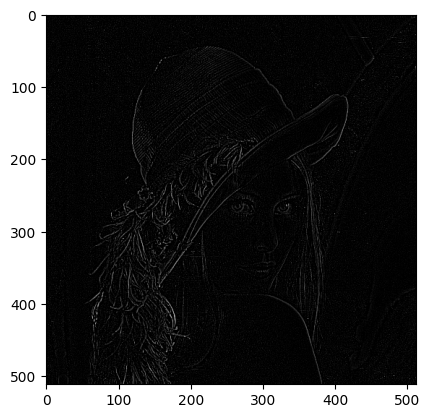

In [50]:
output = cv2.filter2D(gimg1, -1, kernel3)
#cv2_imshow(output)
plt.imshow(output, cmap='gray')

(256, 256, 3)


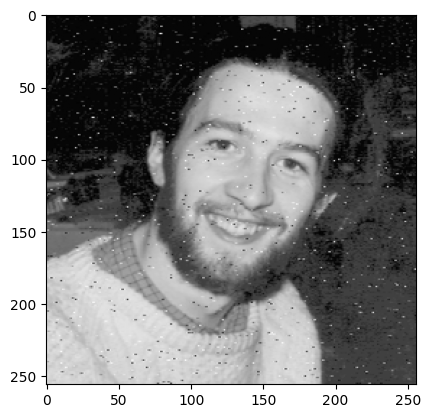

In [51]:
img = cv2.imread('/content/gdrive/My Drive/IP/Images/fcespnoise.bmp')
#img = cv2.imread('/content/gdrive/My Drive/IP/Images/LenaG2.jpg')
#img = cv2.imread('/content/gdrive/My Drive/IP/Images/LenaG1.jpg')
print(img.shape)
gimg1=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gimg1, cmap='gray')
#cv2_imshow(gimg1)

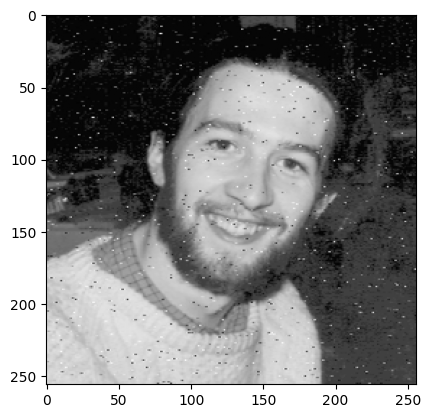

In [52]:
outimg = cv2.blur(gimg1, (3, 3))
#cv2_imshow(outimg)
plt.imshow(gimg1, cmap='gray')

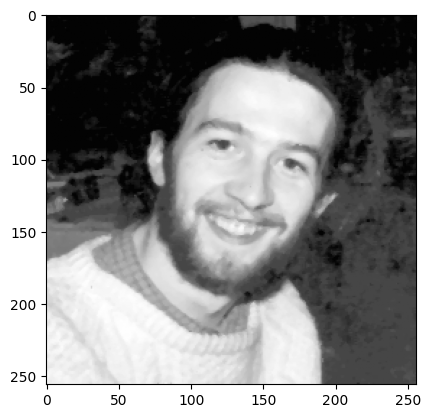

In [54]:
outimg = cv2.medianBlur(gimg1, 3)
plt.imshow(outimg, cmap='gray')